In [1]:
# -          How many platforms are there and how many shows do they have-?
# 	- Which platform is most successful?
# 		- We can answer this based on highest amount of movies and ratings on platform
# -          What are the highest rated movies based on Rotten Tomato-?
# 	- Which shows are on multiple platforms and are they highly rated?
# -          How many movies were released per year?
# - Was there a spike in movies released in any particular year and if yes, why?
# -How many recent (>2015) movies are available for the age group under 18?
# 	- Is there any correlation between age and year? Relationship?
# How many shows are exclusive to each platform? What are their average ratings/which platform has better exclusive shows?
# --------------------------------------------------------------------------------
# Issues with Data:

# We are missing data in Rotten Tomatoes and IMDb columns. Should it be replaced with ‘NaN’?
# We are missing data in Ages. Should it be replaced with ‘NaN’?
# Is ‘type’ even usable?


In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('tv_shows.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [5]:
print(df.shape)

(5611, 11)


In [6]:
df.describe()

,Unnamed: 0,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2805.000000,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,1619.900511,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,0.000000,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1402.500000,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2805.000000,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4207.500000,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,5610.000000,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [7]:
print(df.dtypes)

Unnamed: 0           int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
type                 int64
dtype: object


In [8]:
df.drop(['Unnamed: 0', 'type'], axis=1, inplace=True)

In [9]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0


In [10]:
df.set_index('Title', inplace=True)

In [11]:
df.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
Title,,,,,,,,
Breaking Bad,2008,18+,9.5,96%,1,0,0,0
Stranger Things,2016,16+,8.8,93%,1,0,0,0
Money Heist,2017,18+,8.4,91%,1,0,0,0
Sherlock,2010,16+,9.1,78%,1,0,0,0
Better Call Saul,2015,18+,8.7,97%,1,0,0,0


In [12]:
print('Data dimensions:', df.shape)

Data dimensions: (5611, 8)


In [13]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 5611 entries, Breaking Bad to United States of Animals
Columns: 8 entries, Year to Disney+
dtypes: float64(1), int64(5), object(2)
memory usage: 394.5+ KB


In [14]:
df.index.values

array(['Breaking Bad', 'Stranger Things', 'Money Heist', ...,
       'Wild Russia', 'Love & Vets', 'United States of Animals'],
      dtype=object)

In [15]:
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


In [16]:
all(isinstance(column, str) for column in df.columns)

True

In [17]:
pd.isnull(df).sum()

Year                  0
Age                2446
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
dtype: int64

In [18]:
#-How many recent (>2015) movies are available for each age group?
df['Age'].unique()

array(['18+', '16+', '7+', nan, 'all', '13+'], dtype=object)

In [19]:
df.replace('all', 1, inplace=True)
df['Age'].replace(np.nan, 1, inplace=True)

In [20]:
df['Age'].value_counts()

1      2991
16+    1018
7+      848
18+     750
13+       4
Name: Age, dtype: int64

In [21]:
df['Age'].describe()
df['Year'].describe()

count    5611.000000
mean     2011.021030
std        11.005116
min      1901.000000
25%      2010.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: Year, dtype: float64

In [22]:
# recent_year = df['Year'].unique()
# recent_year

years = df[df['Year']>=2015]['Year'].unique()
years = list(years)
years

[2016, 2017, 2015, 2019, 2018, 2020]

In [23]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [24]:
df_movies = df.copy()

In [25]:
df_movies.head(20)

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
Title,,,,,,,,
Breaking Bad,2008,18+,9.5,96%,1,0,0,0
Stranger Things,2016,16+,8.8,93%,1,0,0,0
Money Heist,2017,18+,8.4,91%,1,0,0,0
Sherlock,2010,16+,9.1,78%,1,0,0,0
Better Call Saul,2015,18+,8.7,97%,1,0,0,0
The Office,2005,16+,8.9,81%,1,0,0,0
Black Mirror,2011,18+,8.8,83%,1,0,0,0
Supernatural,2005,16+,8.4,93%,1,0,0,0
Peaky Blinders,2013,18+,8.8,92%,1,0,0,0


In [26]:
#df_movies.set_index(['Year', 'Age'], inplace=True)
#df_movies.loc['Stranger Things', 'Netflix']

In [27]:
df_movies.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
Title,,,,,,,,
Breaking Bad,2008,18+,9.5,96%,1,0,0,0
Stranger Things,2016,16+,8.8,93%,1,0,0,0
Money Heist,2017,18+,8.4,91%,1,0,0,0
Sherlock,2010,16+,9.1,78%,1,0,0,0
Better Call Saul,2015,18+,8.7,97%,1,0,0,0


In [28]:
df_movies.drop(['IMDb', 'Rotten Tomatoes'], axis=1, inplace=True)

In [29]:
#df_movies.index = list(map(str, df_movies.index))
display(df_movies.dtypes)

Year            int64
Age            object
Netflix         int64
Hulu            int64
Prime Video     int64
Disney+         int64
dtype: object

In [30]:
df_movies = df_movies[df_movies['Year']>=2015].sort_values(['Year', 'Age'], axis=0)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2809 entries, Chef's Table to It's A Dog's Life
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         2809 non-null   int64 
 1   Age          2809 non-null   object
 2   Netflix      2809 non-null   int64 
 3   Hulu         2809 non-null   int64 
 4   Prime Video  2809 non-null   int64 
 5   Disney+      2809 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 153.6+ KB


In [31]:
#df_movies.set_index(['Age'], inplace=True)


In [32]:
movies = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

df2 = df_movies.groupby(['Year', 'Age']).count()



In [33]:

df2['MoviesTotal'] = df2['Netflix'].copy()
df2.head()
df2.drop(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], axis=1, inplace=True)

In [34]:
df2.reset_index(inplace=True)


In [35]:
df2.dtypes

Year            int64
Age            object
MoviesTotal     int64
dtype: object

In [36]:
#df2.sort_values(['Year', 'Age'], ascending=[True, False])
df2["Age"] = df2["Age"].str.replace("+", "")


In [37]:
df2["Age"] = pd.to_numeric(df2["Age"])

In [38]:
df2['Age'] = df2['Age'].fillna(1)

In [39]:
df2.head(10)

,Year,Age,MoviesTotal
0,2015,1.0,238
1,2015,16.0,94
2,2015,18.0,54
3,2015,7.0,68
4,2016,1.0,342
5,2016,16.0,114
6,2016,18.0,52
7,2016,7.0,65
8,2017,1.0,428
9,2017,16.0,86


In [40]:
df2 = df2.sort_values(["Year", "Age"], ascending=[True, False])

In [41]:
df2['Age'] = df2['Age'].astype(int)

In [42]:
df2.dtypes

Year           int64
Age            int32
MoviesTotal    int64
dtype: object

In [52]:
df2.head(10)

MoviesTotal
Year Age             
2015 18            54
     16            94
     7             68
     1            238
2016 18            52
     16           114
     7             65
     1            342
2017 18            83
     16            86

In [44]:
years = list(df2["Year"].unique())
years

[2015, 2016, 2017, 2018, 2019, 2020]

In [45]:
age = list(df2['Age'].unique())
age

[18, 16, 7, 1]

In [46]:
df2.set_index(['Year', 'Age'], inplace=True)


In [47]:
df2.head(10)


MoviesTotal
Year Age             
2015 18            54
     16            94
     7             68
     1            238
2016 18            52
     16           114
     7             65
     1            342
2017 18            83
     16            86

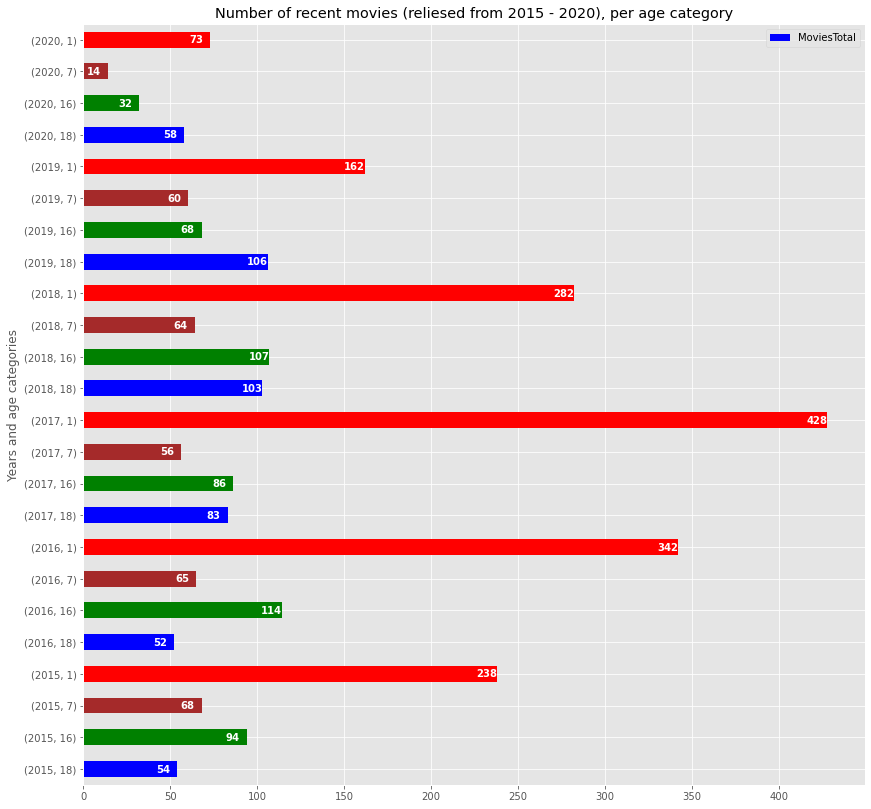

In [61]:
df2.plot(kind= 'barh', figsize=(14,14), 
             color=('blue', 'green', 'brown', 'red'),
             xlabel="Years and age categories",
             ylabel="Number of movies",
             title=('Number of recent movies (reliesed from 2015 - 2020), per age category')
            
            )

for index, value in enumerate(df2['MoviesTotal']): 
    label = format(int(value), ',') # format int with commas

    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 12, index - 0.10), color='white', fontweight='bold')

#plt.legend(labels=['18+'], loc='upper right') 
    
plt.show()



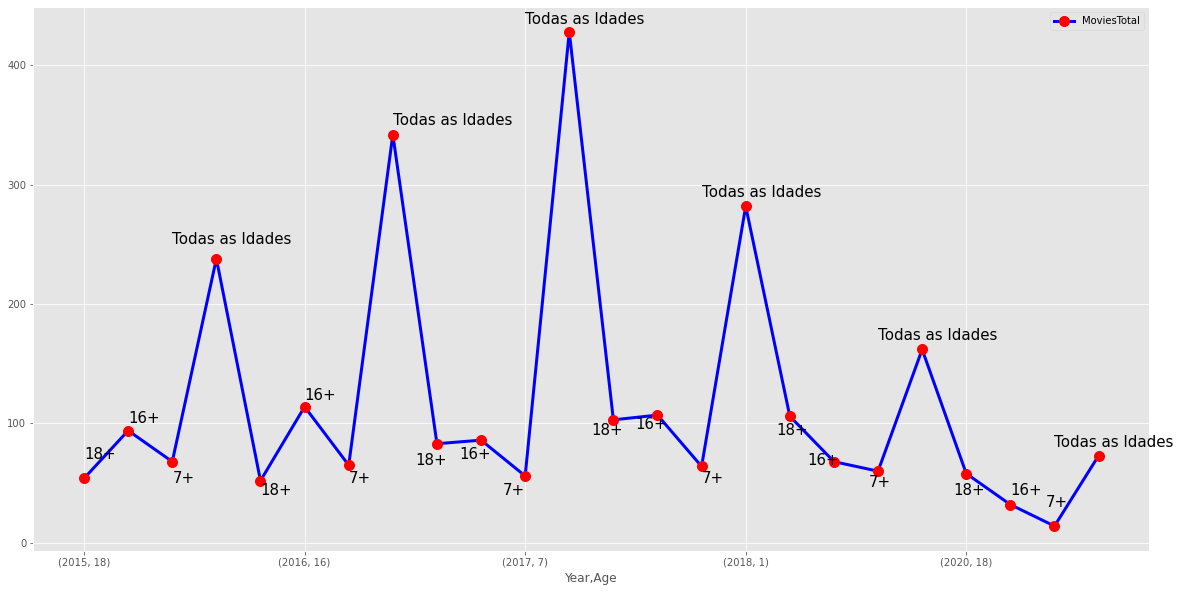

In [49]:
markers_on = age
df2.plot(kind='line', 
             #stacked=True,
             linestyle='-', linewidth = '3',
             color='b',
             marker='o', ms = 10, mfc = 'r', mec = 'r',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.annotate("18+", (0, 70), fontsize=15)
plt.annotate("16+", (1, 100), fontsize=15)
plt.annotate("7+", (2, 50), fontsize=15)
plt.annotate("Todas as Idades", (2, 250), fontsize=15)
plt.annotate("18+", (4, 40), fontsize=15)
plt.annotate("16+", (5, 120), fontsize=15)
plt.annotate("7+", (6, 50), fontsize=15)
plt.annotate("Todas as Idades", (7, 350), fontsize=15)
plt.annotate("18+", (7.5, 65), fontsize=15)
plt.annotate("16+", (8.5, 70), fontsize=15)
plt.annotate("7+", (9.5, 40), fontsize=15)
plt.annotate("Todas as Idades", (10, 435), fontsize=15)
plt.annotate("18+", (11.5, 90), fontsize=15)
plt.annotate("16+", (12.5, 95), fontsize=15)
plt.annotate("7+", (14, 50), fontsize=15)
plt.annotate("Todas as Idades", (14, 290), fontsize=15)
plt.annotate("18+", (15.7, 90), fontsize=15)
plt.annotate("16+", (16.4, 65), fontsize=15)
plt.annotate("7+", (17.8, 47), fontsize=15)
plt.annotate("Todas as Idades", (18, 170), fontsize=15)
plt.annotate("18+", (19.7, 40), fontsize=15)
plt.annotate("16+", (21, 40), fontsize=15)
plt.annotate("7+", (21.8, 30), fontsize=15)
plt.annotate("Todas as Idades", (22, 80), fontsize=15)
plt.show()

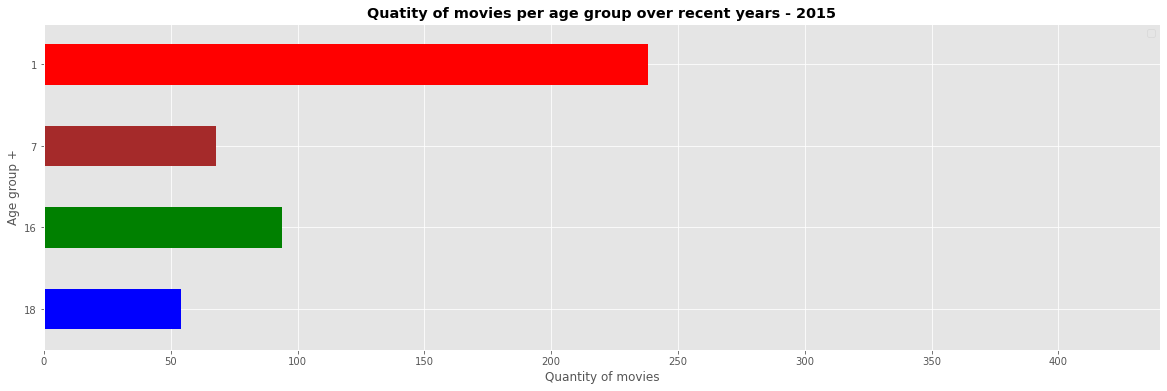

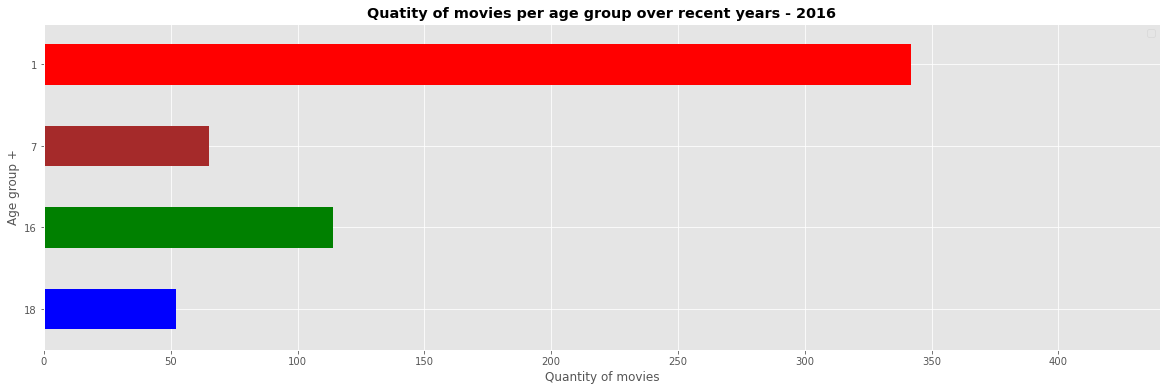

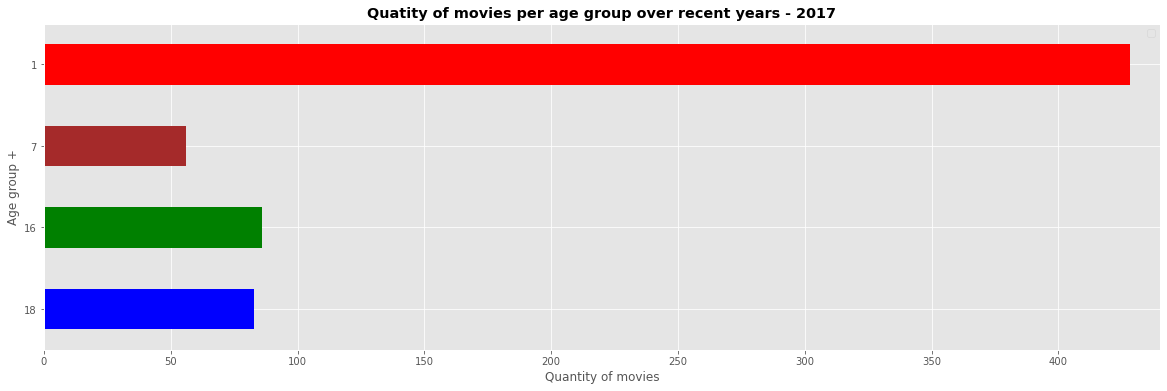

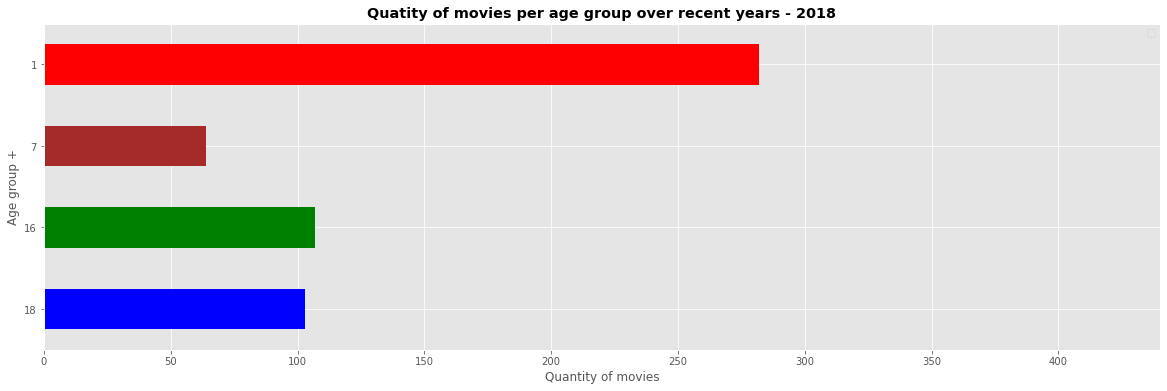

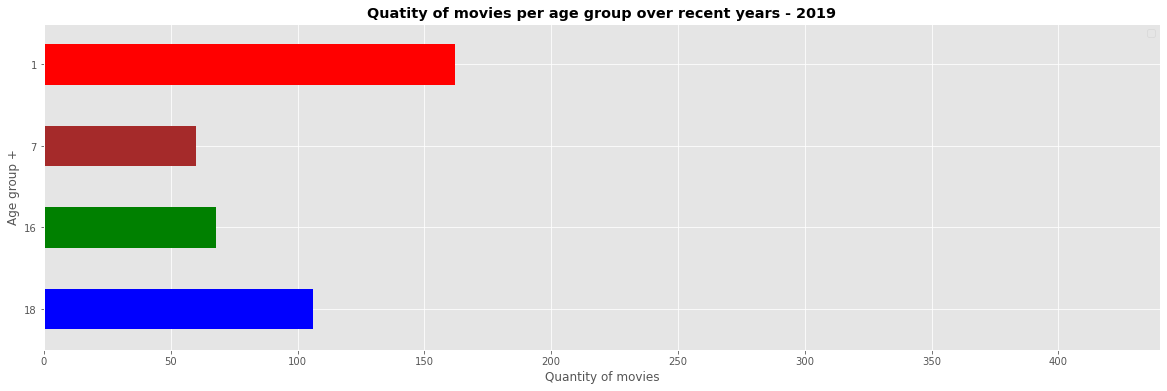

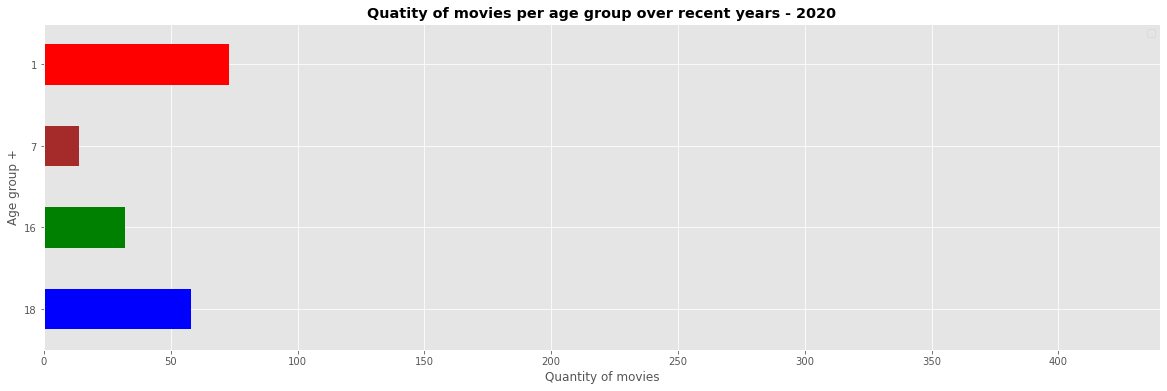

In [50]:
for i in years:
    df2.loc[i].plot(kind='barh', 
             stacked=True,
             figsize=(20, 6), # pass a tuple (x, y) size
             color = ('blue', 'green', 'brown', 'red'),
                    
             )
    plt.title("Quatity of movies per age group over recent years - {}".format(i), fontweight='bold')
    plt.xlabel('Quantity of movies')
    plt.ylabel('Age group +')
    plt.xlim(0, 440, 10)
    plt.legend(labels='', loc='upper right') 
    plt.show()

